# Abalone Ring Prediction

* Abalone is a large marine gastropod mollusk. The large sea snail is most often found in the cold waters of New Zealand, Australia, South Africa, Japan and the west coast of North America. It has extremely rich, flavorful, and highly prized meat that is considered a culinary delicacy.

* Abalone comes under the family of Haliotidae, is famous for its shell and meat. Using  its shells, ornaments or jewelry can be designed.  It is also very rare due to the fact that it grows only on the few no. of shorelines. Depending on the age and the rings the price is determined in the sale market. And it is determined on several factors such as its length, sex, height and diameter and many others. Manually calculating the size of the rings consumes more time for the small work and shows a need for a system that can be built for predicting the ring size.

* Goal : To predict the number of rings based on the provided data.

* Kaggle : https://www.kaggle.com/datasets/rodolfomendes/abalone-dataset/data

# **Import packages and dataset**

In [1]:
# importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from keras.utils import plot_model

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_log_error
from tabulate import tabulate

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

# define the color
colors_hex = ['#5F9EA0', '#20B2AA', '#00CED1', '#008B8B']

# set the color for all plot
sns.set_palette(sns.color_palette(colors_hex))
import matplotlib.patches as mpatches

RuntimeError: module compiled against API version 0x10 but this version of numpy is 0xf

RuntimeError: module compiled against API version 0x10 but this version of numpy is 0xf

RuntimeError: module compiled against API version 0x10 but this version of numpy is 0xf

SystemError: initialization of _pywrap_checkpoint_reader raised unreported exception

In [2]:
# Read abalone dataset
abalone_df = pd.read_csv("abalone.csv")

# **Data Analysis**

In [3]:
# First five records of abalone dataset
abalone_df.head(5)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
# Last five  records of abalone dataset
abalone_df.tail(5)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10
4176,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950,12


In [5]:
# Shape of the abalone dataset
rows = abalone_df.shape[0]
cols = abalone_df.shape[1]

# print the number of  records and features
print("Totals Records :", rows)
print("Total Features :", cols)

Totals Records : 4177
Total Features : 9


* This dataset contains total **4177 records** of abalone with **9 distinct features** related to them.

In [6]:
# dataypes of each column
print("Data types of columns :")
abalone_df.dtypes

Data types of columns :


Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

* This dataset contains columns with various data types.

In [7]:
# Statistical Summary of the dataset
print("Statistical Summary :")
abalone_df.describe().T

Statistical Summary :


,count,mean,std,min,25%,50%,75%,max
Length,4177.0,0.523992,0.120093,0.0750,0.4500,0.5450,0.615,0.8150
Diameter,4177.0,0.407881,0.099240,0.0550,0.3500,0.4250,0.480,0.6500
Height,4177.0,0.139516,0.041827,0.0000,0.1150,0.1400,0.165,1.1300
Whole weight,4177.0,0.828742,0.490389,0.0020,0.4415,0.7995,1.153,2.8255
Shucked weight,4177.0,0.359367,0.221963,0.0010,0.1860,0.3360,0.502,1.4880
Viscera weight,4177.0,0.180594,0.109614,0.0005,0.0935,0.1710,0.253,0.7600
Shell weight,4177.0,0.238831,0.139203,0.0015,0.1300,0.2340,0.329,1.0050
Rings,4177.0,9.933684,3.224169,1.0000,8.0000,9.0000,11.000,29.0000


Insights :

* Mean length of abalone is 0.523992
* Mean hight of abalone is 0.139516
* Mean diameter of abalone is 0.407881
* Mean Shell weight of abalone is 0.238831
* Mean Whole weight of abalone is 0.828742
* Abalone can have minimum 1 and maximum 29 rings.

In [8]:
# Checking duplicate records
print("Duplicate Records :")
abalone_df.duplicated().sum()

Duplicate Records :


0

* There are no duplicate records in the dataset.

In [9]:
# Checking total missing values
print("Total missing values :")
abalone_df.isnull().sum().sum()

Total missing values :


0

* There are no missing values in the dataset.

In [10]:
# Checking unique values from 'Sex' Column
print("Unique values in 'Sex' Column :")
abalone_df['Sex'].unique()

Unique values in 'Sex' Column :


array(['M', 'F', 'I'], dtype=object)

* Sex column has three distinct values such as M, F, I

In [11]:
# Checking value counts of 'Sex' Column
print("Values count of each category in 'Sex' Column :")
abalone_df['Sex'].value_counts()

Values count of each category in 'Sex' Column :


M    1528
I    1342
F    1307
Name: Sex, dtype: int64

* Classes in the Sex column are balanced.

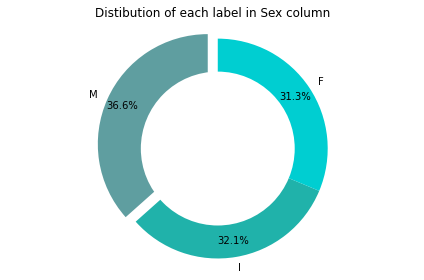

In [12]:
# Count the occurrences of each value from Sex column
class_counts = abalone_df['Sex'].value_counts()

# Data to plot
labels = class_counts.index
sizes = class_counts.values
colors = ['#5F9EA0', '#20B2AA', '#00CED1']
explode = (0.1, 0, 0)

# Create a donut chart
fig, ax = plt.subplots(figsize=(6, 4))
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode=explode)

# Draw a circle in the center
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)
ax.axis('equal')
plt.title('Distibution of each label in Sex column')
plt.tight_layout()
plt.show()

* This dataset contains nearly equal numbers of records of all classes.
* Comparatevely records of male abalone are more than female and infant abalone.

# **Visualization**

In [13]:
# Collecting numerical columns
numerical_cols = abalone_df.select_dtypes(include='number')

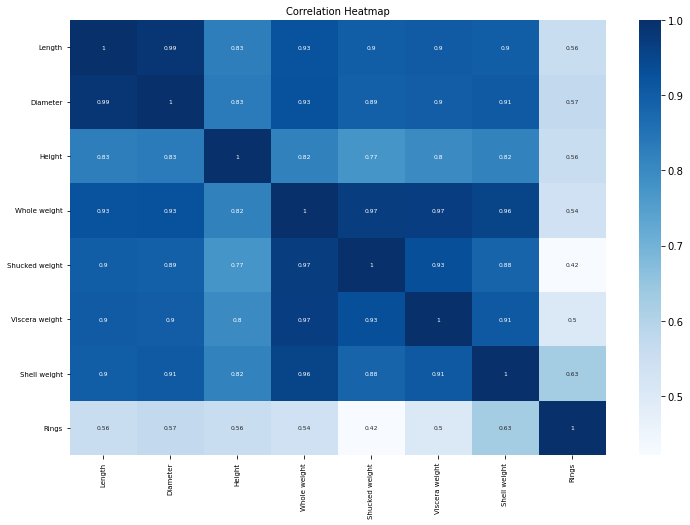

In [14]:
# Correlation matrix
corr = numerical_cols.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='Blues', annot_kws={"fontsize":6})
plt.title('Correlation Heatmap', fontsize=10)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.show()

*  There is a strong positive correlation between the length and diameter of the abalone. This means that as the length of an oyster increases, the diameter  also tend to increase.
*  The weight of the whole abalone is strongly correlated with the weight of the shell and viscera of the abalone.
*  There is a weak positive correlation between the number of rings on the abalone shell and the weight of the abalone. This means that abalone with more rings tend to be slightly heavier.

In [15]:
threshold = 0.7

high_corr_features = []

# Loop through the correlation matrix
for i in range(len(corr.columns)):
    for j in range(i+1, len(corr.columns)):
        if abs(corr.iloc[i, j]) > threshold:
            high_corr_features.append((corr.columns[i], corr.columns[j]))

# Print the high correlation feature pairs
for pair in high_corr_features:
    print(f"{pair[0]} - {pair[1]}: {corr.loc[pair[0], pair[1]]}")

Length - Diameter: 0.9868115846025
Length - Height: 0.8275536093192142
Length - Whole weight: 0.9252611721489467
Length - Shucked weight: 0.8979136582496655
Length - Viscera weight: 0.9030176990077563
Length - Shell weight: 0.8977055691879205
Diameter - Height: 0.8336836879586538
Diameter - Whole weight: 0.9254521015071313
Diameter - Shucked weight: 0.8931624751432796
Diameter - Viscera weight: 0.8997244291071196
Diameter - Shell weight: 0.905329781213082
Height - Whole weight: 0.8192207728553582
Height - Shucked weight: 0.7749722929028299
Height - Viscera weight: 0.79831929752753
Height - Shell weight: 0.8173380147032083
Whole weight - Shucked weight: 0.969405456703434
Whole weight - Viscera weight: 0.9663750782730317
Whole weight - Shell weight: 0.9553554421763288
Shucked weight - Viscera weight: 0.9319613217425567
Shucked weight - Shell weight: 0.88261706017464
Viscera weight - Shell weight: 0.9076563206965705


* Above given fetures are strongly correlated.
* These are above threshold value 0.7.

In [16]:
# Function to count outliers in a column
def count_outliers(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return outliers.shape[0]

# Count outliers for each column
outliers_count = numerical_cols.apply(count_outliers)

# Print the count of outliers for each column
print("Count of outliers in each column:")
print(outliers_count)

Count of outliers in each column:
Length             49
Diameter           59
Height             29
Whole weight       30
Shucked weight     48
Viscera weight     26
Shell weight       35
Rings             278
dtype: int64


* It represents the total number of outliers in each column.

In [17]:
# Total outliers in the entire dataset
print("Number of outliers in the dataset :")
outliers_count.sum()

Number of outliers in the dataset :


554

* There are total 554 outliers in the entire dataset.

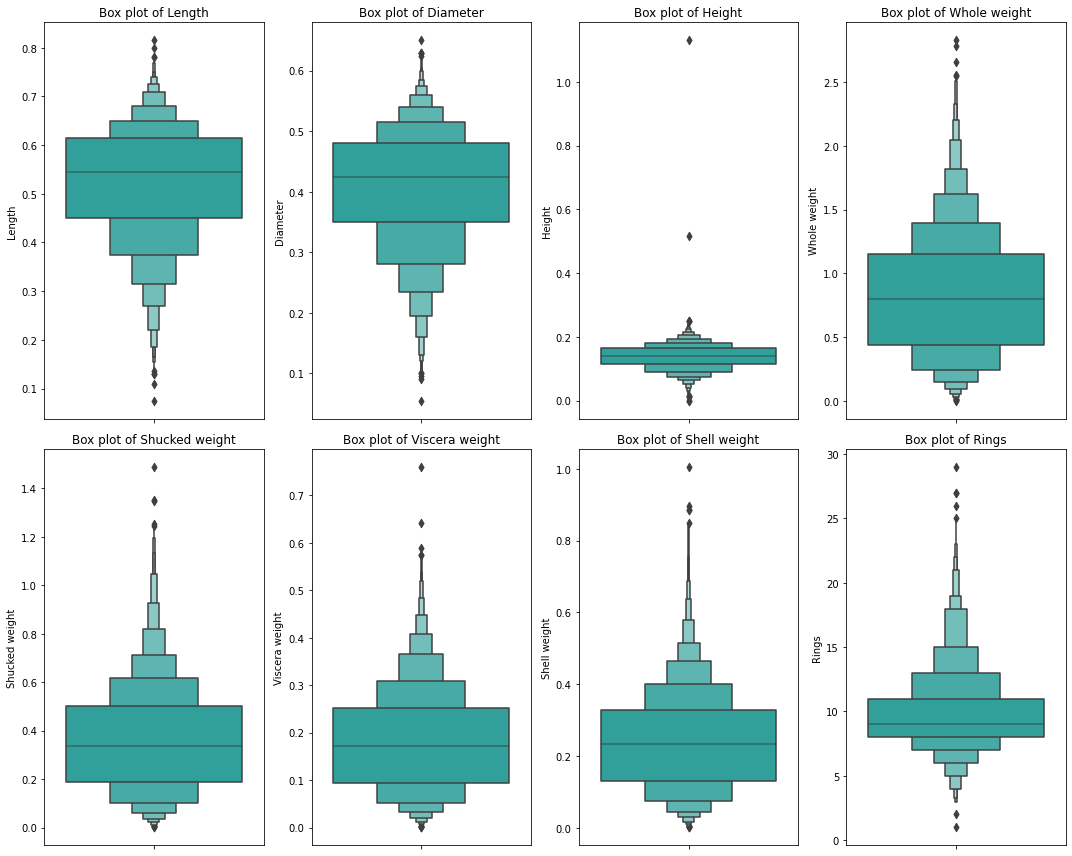

In [18]:
# Plotting box plot
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 12))

# Flatten axes for easy iteration
axes = axes.flatten()

# Create box plots for numerical features
for i, feature in enumerate(numerical_cols):
    sns.boxenplot(y=numerical_cols[feature], ax=axes[i], color='#20B2AA')
    axes[i].set_title(f'Box plot of {feature}')
    axes[i].set_ylabel(feature)

plt.tight_layout()
plt.show()

* This box plots represents the outliers presents in the columns.
* All columns have some outliers.

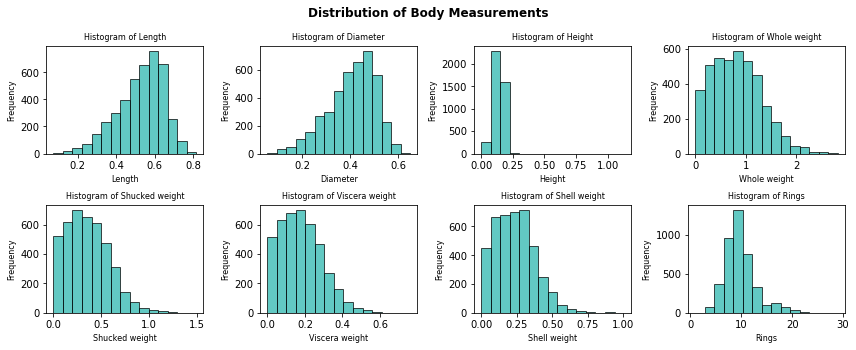

In [19]:
# Plotting histograms

# Set the figure size
plt.figure(figsize=(12, 9))

# Loop through each column
for i, col in enumerate(numerical_cols.columns):
    plt.subplot(4, 4, i + 1)
    plt.hist(numerical_cols[col], bins=15, edgecolor='black', alpha=0.7, color='#20B2AA')
    plt.xlabel(col, fontsize=8)
    plt.ylabel('Frequency', fontsize=8)
    plt.title(f'Histogram of {col}', fontsize=8)

plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.suptitle('Distribution of Body Measurements', fontsize=12, fontweight='bold')

# Display the plot
plt.show()

* These KDE plots represents the data distribution of each column.
* Column lenght and diameter are leftly skweed. As age increases length and diameter also increases. This daatset contains more records of female and male abalones that infants.
* All types of weight columns are rightly skweed.
* Rings column follows the normal distribution but also have some extreme values.

NameError: name 'mpatches' is not defined

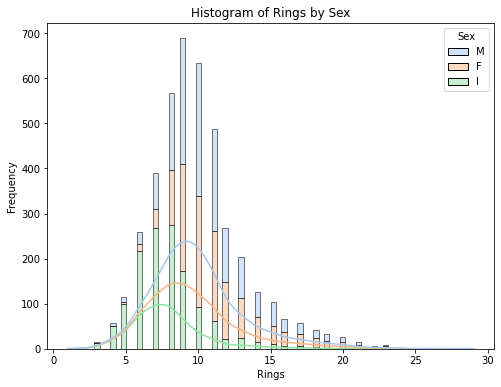

In [21]:
# Plotting
plt.figure(figsize=(8, 6))
ax = sns.histplot(data=abalone_df, x="Rings", hue="Sex", kde=True, multiple="stack", palette="pastel")
plt.title('Histogram of Rings by Sex')
plt.xlabel('Rings')
plt.ylabel('Frequency')

# Create custom legend handles
handles = [mpatches.Patch(color=color, label=label) for color, label in zip(sns.color_palette("pastel"), ["Male", "Female", "Infant"])]

# Add legend with custom handles
plt.legend(handles=handles, title='Sex')

plt.show()

* Mostly infant abalone tends to have rings between 5 to 10.
* Most of the female abalone tends to have rings between 9 to 11.
* Generally male abalone tends to have rings between 9 to 11.

# **Data Preprocessing**

In [22]:
# Make copy of orginal data
df = abalone_df.copy()

### **Label Encoding**

In [23]:
# intilize the label encoder
encoder = LabelEncoder()

# label encode Sex
df['Sex'] = encoder.fit_transform(df['Sex'])

* Label Encoding is performed to convert Sex column into numerical format.

### **Scaling**

In [24]:
# Seperating independent and dependent columns
X = df.drop('Rings', axis=1)
y = df['Rings']

In [25]:
# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler to the data and transform the data
scaled_data = scaler.fit_transform(X)

In [26]:
# Scaled data
scaled_data

array([[ 1.15198011, -0.57455813, -0.43214879, ..., -0.60768536,
        -0.72621157, -0.63821689],
       [ 1.15198011, -1.44898585, -1.439929  , ..., -1.17090984,
        -1.20522124, -1.21298732],
       [-1.28068972,  0.05003309,  0.12213032, ..., -0.4634999 ,
        -0.35668983, -0.20713907],
       ...,
       [ 1.15198011,  0.6329849 ,  0.67640943, ...,  0.74855917,
         0.97541324,  0.49695471],
       [-1.28068972,  0.84118198,  0.77718745, ...,  0.77334105,
         0.73362741,  0.41073914],
       [ 1.15198011,  1.54905203,  1.48263359, ...,  2.64099341,
         1.78744868,  1.84048058]])

* StandardScalar Scaling method is applied on the dataset to transform entire dataset on same scale.

### **PCA**

In [27]:
# Performing PCA
pca = PCA()
pca.fit_transform(scaled_data)

array([[-1.77255859e+00, -1.13417162e+00, -3.52882300e-01, ...,
         4.66606581e-02,  1.07098102e-01, -1.93084410e-02],
       [-3.37910362e+00, -1.10917846e+00, -6.62931850e-02, ...,
        -7.39168185e-05,  7.84319169e-03,  1.96892189e-03],
       [-4.63678666e-01,  1.30350648e+00,  2.05940849e-01, ...,
        -1.99391295e-02,  4.36690251e-02, -4.43947640e-02],
       ...,
       [ 2.15046237e+00, -1.16522037e+00,  7.65878726e-01, ...,
        -2.22322697e-01,  4.09947982e-02,  2.42999010e-02],
       [ 1.66588922e+00,  1.24641982e+00, -3.48563624e-01, ...,
        -4.69261587e-02, -2.68725118e-02,  9.62800782e-02],
       [ 4.87723004e+00, -1.26782372e+00, -6.59627610e-01, ...,
         5.21726854e-01, -3.16284556e-02, -4.22138247e-02]])

Number of components for 95% variance: 3


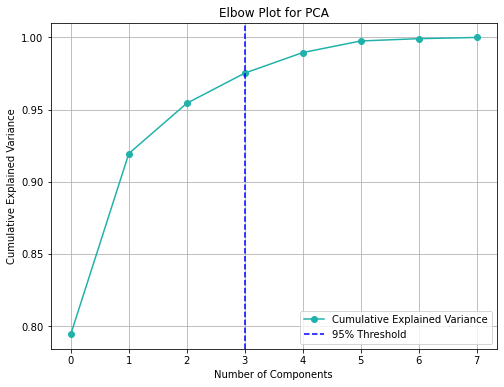

In [28]:
# pca is already fitted
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
n_components_threshold = np.argmax(cumulative_variance >= 0.95) + 1  # 95% threshold
print("Number of components for 95% variance:", n_components_threshold)

# Plot with threshold
plt.figure(figsize=(8, 6))
plt.plot(cumulative_variance, marker='o', label='Cumulative Explained Variance',color='#20B2AA')
plt.axvline(x=n_components_threshold, color='blue', linestyle='--', label='95% Threshold')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Elbow Plot for PCA')
plt.legend()
plt.grid(True)
plt.show()

*

In [29]:
# Apply PCA with the optimal number of components
pca = PCA(n_components=6)
X_pca = pca.fit_transform(scaled_data)

# Create new column names for the PCA components
pca_columns = [f'PC{i+1}' for i in range(X_pca.shape[1])]

# Create a DataFrame for the PCA components
df_pca = pd.DataFrame(data=X_pca, columns=pca_columns)

In [30]:
df_pca

,PC1,PC2,PC3,PC4,PC5,PC6
0,-1.772559,-1.134172,-0.352882,-0.343974,-0.088159,0.046661
1,-3.379104,-1.109178,-0.066293,0.237461,-0.029332,-0.000074
2,-0.463679,1.303506,0.205941,-0.426641,-0.084546,-0.019939
3,-1.525578,-1.121245,0.246129,-0.016507,-0.014009,-0.040183
4,-3.652712,0.103676,-0.275427,0.277278,-0.006143,0.041795
...,...,...,...,...,...,...
4172,0.819888,1.286073,0.341004,-0.048451,0.188416,-0.356154
4173,0.702512,-1.170011,-0.289994,-0.308205,0.091952,-0.044388
4174,2.150462,-1.165220,0.765879,0.383327,0.360209,-0.222323
4175,1.665889,1.246420,-0.348564,-0.288678,0.259940,-0.046926


In [31]:
X = df_pca

## Train Test Split

In [32]:
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Model Building

## Ridge

In [33]:
# intialize ridge regression
model_rr = Ridge()

# Train the Ridge Regressor
model_rr.fit(X_train, y_train)

Ridge()

In [40]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
# Predict on the test set
y_pred_rr = model_rr.predict(X_test)

# evaluating the performance for ridge regression
print("Evaluation Metric Results of Ridge Regression")

r2_rr = r2_score(y_test, y_pred_rr)
mae_rr = mean_absolute_error(y_test, y_pred_rr)
mse_rr = mean_squared_error(y_test, y_pred_rr)
rmse_rr = np.sqrt(mse_rr)
msle_rr = mean_squared_log_error(y_test, y_pred_rr)
rmsle_rr = np.sqrt(msle_rr)

print("R-squared :", r2_rr)
print("Mean Absolute Error:", mae_rr)
print("Mean Squared Error:", mse_rr)
print("Root Mean Squared Error:", rmse_rr)
print("Mean Squared Logarithmic Error (MSLE):", msle_rr)
print("Root Mean Squared Logarithmic Error (RMSLE):", rmsle_rr)

Evaluation Metric Results of Ridge Regression
R-squared : 0.5040346617472962
Mean Absolute Error: 1.6821670452671842
Mean Squared Error: 5.368928961901524
Root Mean Squared Error: 2.3170949402002337
Mean Squared Logarithmic Error (MSLE): 0.03717194324546782
Root Mean Squared Logarithmic Error (RMSLE): 0.19280026775258333


With Tuning

In [41]:
# Define a grid of alpha values
alphas = [10, 50, 100, 500, 1000]

# Create a parameter grid
param_grid = {'alpha': alphas}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator= model_rr, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the GridSearchCV to the data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [10, 50, 100, 500, 1000]},
             scoring='neg_mean_squared_error')

In [42]:
# Get the best alpha value from the grid search
best_alpha = grid_search.best_params_['alpha']

# Use the best alpha to train the final Ridge Regression model
final_ridge = Ridge(alpha=best_alpha)
final_ridge.fit(X_train, y_train)

Ridge(alpha=10)

In [43]:
# Predict on the test set
y_pred_rr_t = final_ridge.predict(X_test)

# evaluating the performance for ridge regression after tuning
print("Evaluation Metric Results of Ridge Regression after tuning")

r2_rr_t = r2_score(y_test, y_pred_rr_t)
mae_rr_t = mean_absolute_error(y_test, y_pred_rr_t)
mse_rr_t = mean_squared_error(y_test, y_pred_rr_t)
rmse_rr_t = np.sqrt(mse_rr_t)
msle_rr_t = mean_squared_log_error(y_test, y_pred_rr_t)
rmsle_rr_t = np.sqrt(msle_rr_t)

print("R-squared :", r2_rr_t)
print("Mean Absolute Error:", mae_rr_t)
print("Mean Squared Error:", mse_rr_t)
print("Root Mean Squared Error:", rmse_rr_t)
print("Mean Squared Logarithmic Error (MSLE):", msle_rr_t)
print("Root Mean Squared Logarithmic Error (RMSLE):", rmsle_rr_t)

Evaluation Metric Results of Ridge Regression after tuning
R-squared : 0.5045041799663816
Mean Absolute Error: 1.6794271364480875
Mean Squared Error: 5.363846328559709
Root Mean Squared Error: 2.3159979120369925
Mean Squared Logarithmic Error (MSLE): 0.03682533219146184
Root Mean Squared Logarithmic Error (RMSLE): 0.19189927616190178


## SVR

In [44]:
# Initialize the SVM regressor
model_svm = SVR()

# Fit the model on the training data
model_svm.fit(X_train, y_train)

SVR()

Without Tuning

In [45]:
# Predict on the test set
y_pred_svm = model_svm.predict(X_test)

# evaluating the performance for ridge regression
print("Evaluation Metric Results of Ridge Regression")

r2_svm = r2_score(y_test, y_pred_svm)
mae_svm = mean_absolute_error(y_test, y_pred_svm)
mse_svm = mean_squared_error(y_test, y_pred_svm)
rmse_svm = np.sqrt(mse_svm)
msle_svm = mean_squared_log_error(y_test, y_pred_svm)
rmsle_svm = np.sqrt(msle_svm)

print("R-squared :", r2_svm)
print("Mean Absolute Error:", mae_svm)
print("Mean Squared Error:", mse_svm)
print("Root Mean Squared Error:", rmse_svm)
print("Mean Squared Logarithmic Error (MSLE):", msle_svm)
print("Root Mean Squared Logarithmic Error (RMSLE):", rmsle_svm)

Evaluation Metric Results of Ridge Regression
R-squared : 0.5264586179053519
Mean Absolute Error: 1.541938590782184
Mean Squared Error: 5.1261849264381985
Root Mean Squared Error: 2.2641079758788445
Mean Squared Logarithmic Error (MSLE): 0.031054633869446888
Root Mean Squared Logarithmic Error (RMSLE): 0.17622325008195397


With Tuning

In [46]:
# Define the hyperparameter grid to search
param_grid = {
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.01, 0.1, 1, 10]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model_svm, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search on the training data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100], 'epsilon': [0.01, 0.1, 1, 10]},
             scoring='neg_mean_squared_error')

In [47]:
# Get the best estimator from the grid search
best_svm_regressor = grid_search.best_estimator_

# Make predictions on the testing data using the best estimator
y_pred_svm_t = best_svm_regressor.predict(X_test)

# evaluating the performance for ridge regression
print("Evaluation Metric Results of SVR Regression")

r2_svm_t = r2_score(y_test, y_pred_svm_t)
mae_svm_t = mean_absolute_error(y_test, y_pred_svm_t)
mse_svm_t = mean_squared_error(y_test, y_pred_svm_t)
rmse_svm_t = np.sqrt(mse_svm_t)
msle_svm_t = mean_squared_log_error(y_test, y_pred_svm_t)
rmsle_svm_t = np.sqrt(msle_svm_t)

print("R-squared :", r2_svm_t)
print("Mean Absolute Error:", mae_svm_t)
print("Mean Squared Error:", mse_svm_t)
print("Root Mean Squared Error:", rmse_svm_t)
print("Mean Squared Logarithmic Error (MSLE):", msle_svm_t)
print("Root Mean Squared Logarithmic Error (RMSLE):", rmsle_svm_t)

# Print the best parameters found by GridSearchCV
print("\nBest Parameters:", grid_search.best_params_)

Evaluation Metric Results of SVR Regression
R-squared : 0.5337231713817936
Mean Absolute Error: 1.5445414444708778
Mean Squared Error: 5.047544609168531
Root Mean Squared Error: 2.246674121711587
Mean Squared Logarithmic Error (MSLE): 0.030882558066914537
Root Mean Squared Logarithmic Error (RMSLE): 0.1757343394641882

Best Parameters: {'C': 10, 'epsilon': 1}


## LightGBM

In [48]:
# Initialize the LightGBM regressor
model_lgbm = LGBMRegressor()

# Fit the regressor on the training data
model_lgbm .fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000522 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 3341, number of used features: 6
[LightGBM] [Info] Start training from score 9.944627


LGBMRegressor()

In [49]:
# Predict on the test data
y_pred_lgbm = model_lgbm.predict(X_test)

# evaluating the performance for ridge regression
print("Evaluation Metric Results of LightGBM Regression")

r2_lgbm = r2_score(y_test, y_pred_lgbm)
mae_lgbm = mean_absolute_error(y_test, y_pred_lgbm)
mse_lgbm = mean_squared_error(y_test, y_pred_lgbm)
rmse_lgbm = np.sqrt(mse_lgbm)
msle_lgbm = mean_squared_log_error(y_test, y_pred_lgbm)
rmsle_lgbm = np.sqrt(msle_lgbm)

print("R-squared :", r2_lgbm)
print("Mean Absolute Error:", mae_lgbm)
print("Mean Squared Error:", mse_lgbm)
print("Root Mean Squared Error:", rmse_lgbm)
print("Mean Squared Logarithmic Error (MSLE):", msle_lgbm)
print("Root Mean Squared Logarithmic Error (RMSLE):", rmsle_lgbm)

Evaluation Metric Results of LightGBM Regression
R-squared : 0.5250781969751134
Mean Absolute Error: 1.5958076697103853
Mean Squared Error: 5.141128272959314
Root Mean Squared Error: 2.2674056260315036
Mean Squared Logarithmic Error (MSLE): 0.03205316853034739
Root Mean Squared Logarithmic Error (RMSLE): 0.17903398708163595


In [50]:
# Define the parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator= model_lgbm, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000236 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 2227, number of used features: 6
[LightGBM] [Info] Start training from score 10.021105
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000236 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 2227, number of used features: 6
[LightGBM] [Info] Start training from score 9.885945
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000183 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 2228, number of used features: 6
[LightGBM] [Info] Start training

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000169 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 2227, number of used features: 6
[LightGBM] [Info] Start training from score 10.021105
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000275 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 2227, number of used features: 6
[LightGBM] [Info] Start training from score 10.021105
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Lig

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000265 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 2227, number of used features: 6
[LightGBM] [Info] Start training from score 9.885945
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000266 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000183 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 2228, number of used features: 6
[LightGBM] [Info] Start training from score 9.926840
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000166 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 2227, number of used features: 6
[LightGBM] [Info] Start training from score 9.885945
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM]

[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 2227, number of used features: 6
[LightGBM] [Info] Start training from score 10.021105
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Start training from score 10.021105
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with po

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000187 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 2228, number of used features: 6
[LightGBM] [Info] Start training from score 9.926840
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000146 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 2227, number of used features: 6
[LightGBM] [Info] Start training from score 10.021105
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000134 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 2227, number of used features: 6
[LightGBM] [Info] Start training from score 10.021105
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000138 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 2228, number of used features: 6
[LightGBM] [Info] Start training from score 9.926840
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000133 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 2227, number of used features: 6
[LightGBM] [Info] Start training from score 9.885945
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

GridSearchCV(cv=3, estimator=LGBMRegressor(),
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [51]:
# Get the best parameters
best_params = grid_search.best_params_

# Initialize a new LightGBM regressor with the best parameters
best_lgbm_regressor = LGBMRegressor(**best_params)

# Fit the regressor on the training data
best_lgbm_regressor.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000268 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 3341, number of used features: 6
[LightGBM] [Info] Start training from score 9.944627
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

LGBMRegressor(learning_rate=0.05, max_depth=3)

In [52]:
# Predict on the test data
y_pred_lgbm_t = best_lgbm_regressor.predict(X_test)

# evaluating the performance for ridge regression
print("Evaluation Metric Results of LightGBM Regression")

r2_lgbm_t = r2_score(y_test, y_pred_lgbm_t)
mae_lgbm_t = mean_absolute_error(y_test, y_pred_lgbm_t)
mse_lgbm_t = mean_squared_error(y_test, y_pred_lgbm_t)
rmse_lgbm_t = np.sqrt(mse_lgbm_t)
msle_lgbm_t = mean_squared_log_error(y_test, y_pred_lgbm_t)
rmsle_lgbm_t = np.sqrt(msle_lgbm_t)

print("R-squared :", r2_lgbm_t)
print("Mean Absolute Error:", mae_lgbm_t)
print("Mean Squared Error:", mse_lgbm_t)
print("Root Mean Squared Error:", rmse_lgbm_t)
print("Mean Squared Logarithmic Error (MSLE):", msle_lgbm_t)
print("Root Mean Squared Logarithmic Error (RMSLE):", rmsle_lgbm_t)

# Print the best parameters found by GridSearchCV
print("\nBest Parameters:", grid_search.best_params_)

Evaluation Metric Results of LightGBM Regression
R-squared : 0.5500152099533191
Mean Absolute Error: 1.5536237988422443
Mean Squared Error: 4.871179869561442
Root Mean Squared Error: 2.2070749578483833
Mean Squared Logarithmic Error (MSLE): 0.03088184936620805
Root Mean Squared Logarithmic Error (RMSLE): 0.17573232305471878

Best Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}


## ANN

In [70]:
# Define the model
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(100, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='linear'))

# Print the summary of the model
model.summary()

RuntimeError: module compiled against API version 0x10 but this version of numpy is 0xf

SystemError: initialization of _pywrap_checkpoint_reader raised unreported exception

In [67]:
# Compile the model
model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001), metrics=['mae'])

NameError: name 'model' is not defined

In [60]:
# Plot the model summary
plot_model(model,show_shapes=True, show_layer_names=True)

NameError: name 'plot_model' is not defined

In [713]:
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.2, verbose=1)

Epoch 1/100
42/42 [==============================] - 3s 14ms/step - loss: 95.2900 - mae: 9.1856 - val_loss: 58.2062 - val_mae: 7.0009
Epoch 2/100
42/42 [==============================] - 0s 7ms/step - loss: 26.0782 - mae: 3.8778 - val_loss: 11.5959 - val_mae: 2.5480
Epoch 3/100
42/42 [==============================] - 0s 7ms/step - loss: 10.3005 - mae: 2.2145 - val_loss: 6.2087 - val_mae: 1.7950
Epoch 4/100
42/42 [==============================] - 0s 6ms/step - loss: 7.2831 - mae: 1.8617 - val_loss: 5.8420 - val_mae: 1.6768
Epoch 5/100
42/42 [==============================] - 0s 7ms/step - loss: 6.6726 - mae: 1.7962 - val_loss: 5.2044 - val_mae: 1.6094
Epoch 6/100
42/42 [==============================] - 0s 7ms/step - loss: 6.1779 - mae: 1.7495 - val_loss: 5.1120 - val_mae: 1.5728
Epoch 7/100
42/42 [==============================] - 0s 3ms/step - loss: 5.8956 - mae: 1.7190 - val_loss: 4.9337 - val_mae: 1.5455
Epoch 8/100
42/42 [==============================] - 0s 4ms/step - loss: 5.61

In [714]:
# Evaluate the model on the test set
y_pred_ann = model.predict(X_test)

27/27 [==============================] - 0s 1ms/step


In [715]:
# evaluating the performance of ann
print("Evaluation Metric Results of ANN")

r2_ann = r2_score(y_test, y_pred_ann)
mae_ann = mean_absolute_error(y_test, y_pred_ann)
mse_ann = mean_squared_error(y_test, y_pred_ann)
rmse_ann = np.sqrt(mse_ann)
msle_ann = mean_squared_log_error(y_test, y_pred_ann)
rmsle_ann = np.sqrt(msle_ann)

print("R-squared :", r2_ann)
print("Mean Absolute Error:", mae_ann)
print("Mean Squared Error:", mse_ann)
print("Root Mean Squared Error:", rmse_ann)
print("Mean Squared Logarithmic Error (MSLE):", msle_ann)
print("Root Mean Squared Logarithmic Error (RMSLE):", rmsle_ann)

Evaluation Metric Results of ANN
R-squared : 0.5540002335009477
Mean Absolute Error: 1.6122973532767957
Mean Squared Error: 4.82804115262187
Root Mean Squared Error: 2.1972803991802845
Mean Squared Logarithmic Error (MSLE): 0.03151470508835701
Root Mean Squared Logarithmic Error (RMSLE): 0.17752381555260976


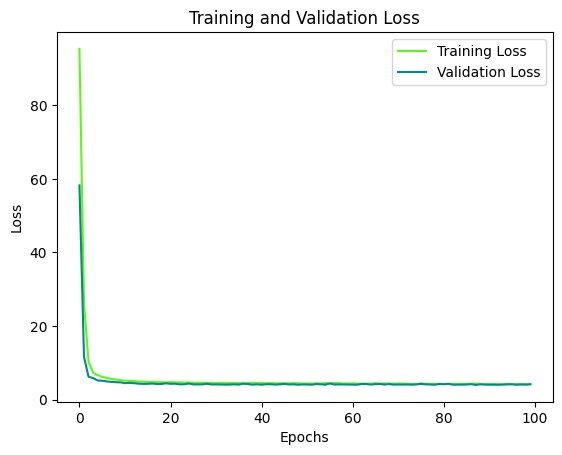

In [716]:
# Extract loss and validation loss from the history
loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot loss curves with colors
plt.plot(loss, label='Training Loss', color='#59F913')
plt.plot(val_loss, label='Validation Loss', color='#008B8B')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Enable interactive mode
plt.ion()

# Show the plot
plt.show()

# Comparative Analysis

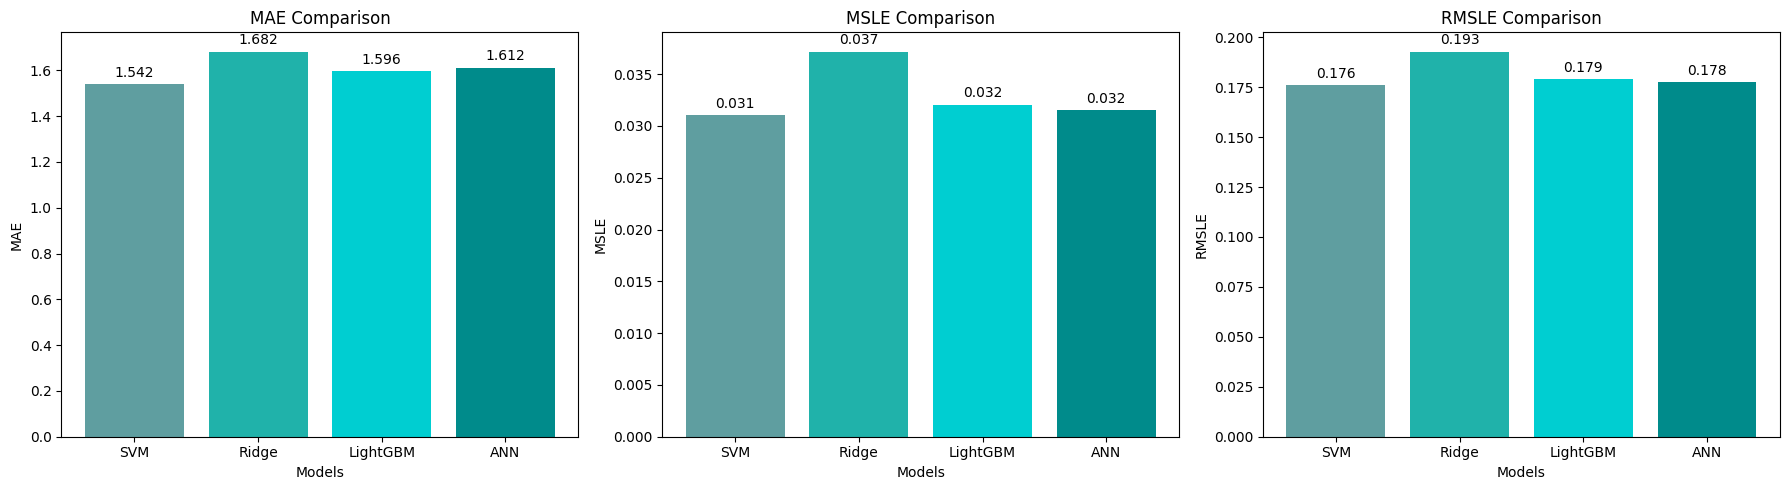

In [717]:
models = ['SVM', 'Ridge', 'LightGBM', 'ANN']
metrics = ['MAE', 'MSLE', 'RMSLE']
values = [[mae_svm, mae_rr, mae_lgbm, mae_ann],
          [msle_svm, msle_rr, msle_lgbm, msle_ann],
          [rmsle_svm, rmsle_rr, rmsle_lgbm, rmsle_ann]]

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, ax in enumerate(axes.flat):
    bars = ax.bar(models, values[i], color=['#5F9EA0', '#20B2AA', '#00CED1', '#008B8B'])
    ax.set_title(f'{metrics[i]} Comparison')
    ax.set_xlabel('Models')
    ax.set_ylabel(metrics[i])

    # Annotate bars with their values
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(round(height, 3)),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.tight_layout()
plt.show()

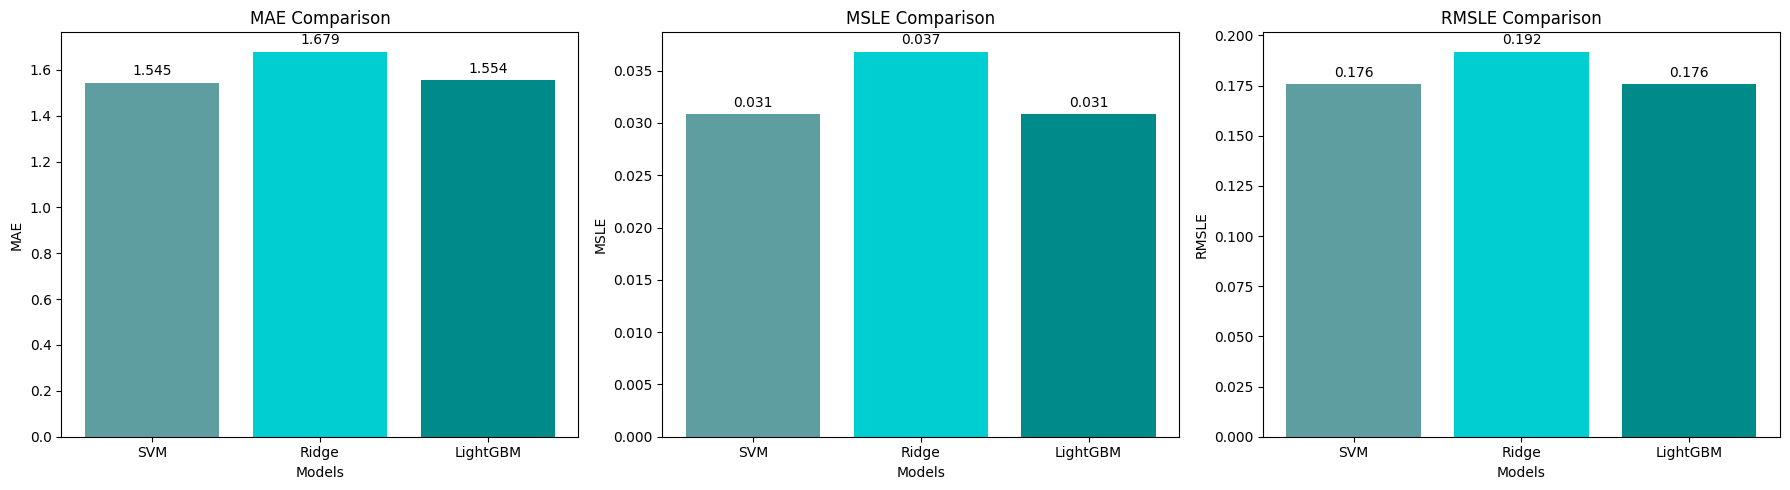

In [718]:
models = ['SVM', 'Ridge', 'LightGBM']
metrics = ['MAE', 'MSLE', 'RMSLE']
values = [[mae_svm_t, mae_rr_t, mae_lgbm_t],
          [msle_svm_t, msle_rr_t, msle_lgbm_t],
          [rmsle_svm_t, rmsle_rr_t, rmsle_lgbm_t]]

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, ax in enumerate(axes.flat):
    bars = ax.bar(models, values[i], color=['#5F9EA0', '#00CED1', '#008B8B'])
    ax.set_title(f'{metrics[i]} Comparison')
    ax.set_xlabel('Models')
    ax.set_ylabel(metrics[i])

    # Annotate bars with their values
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(round(height, 3)),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.tight_layout()
plt.show()

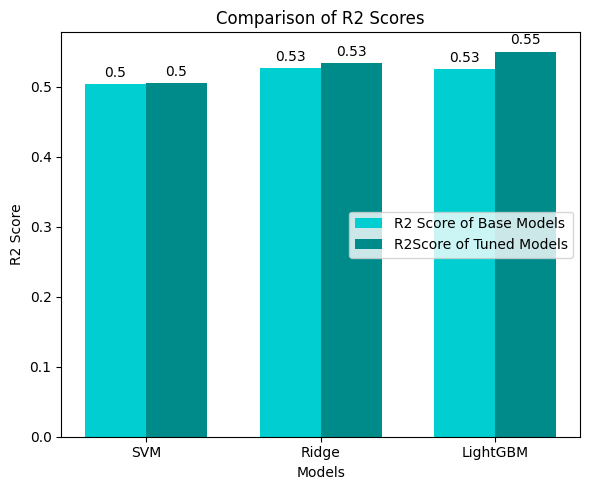

In [720]:
# Models and their MSE values
models = ['SVM', 'Ridge', 'LightGBM']
r2_without_tuning = [r2_rr, r2_svm, r2_lgbm]
r2_with_tuning = [r2_rr_t, r2_svm_t, r2_lgbm_t]

# Plotting
bar_width = 0.35
index = np.arange(len(models))

fig, ax = plt.subplots(figsize=(6, 5))

bar1 = ax.bar(index, r2_without_tuning, bar_width, label='R2 Score of Base Models', color='#00CED1')
bar2 = ax.bar(index + bar_width, r2_with_tuning, bar_width, label='R2Score of Tuned Models', color='#008B8B')

# Add labels, title, and legend
ax.set_xlabel('Models')
ax.set_ylabel('R2 Score')
ax.set_title('Comparison of R2 Scores')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(models)
ax.legend(fontsize=10, loc='center right')

# Add values on top of the bars
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom',fontsize=10)
autolabel(bar1)
autolabel(bar2)
plt.tight_layout()
plt.show()

# Conclusion

* All models built with machine learning algorithms such as Ridge Regression, SVM, LightGBM and neural network were performing well but again to increase there predictive capability hyperparameter tuning is applied but it does not benefited much.
* Only for LightGBM it has boosted the performance and minimining the loss.
* So tunned LightGBM model can be the good option for building abalone ring prediction model.

# Challenges and solutions
* Challenges like selecting the normalization methods along with selecting the n_components for performing pca as with elbow plot got less components and the model was not performing as wanted.
* Suitable methods wer selected manually.



